<a href="https://colab.research.google.com/github/annakasper1/QNC/blob/main/Parametric_Correlation_Coefficient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise answers**

1. Plot X vs Y. Do they look related?

Yes, they look somewhat positively correlated.

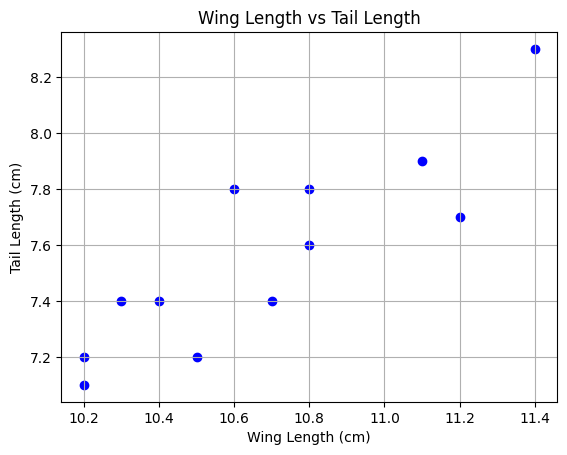

In [4]:
import matplotlib.pyplot as plt

# Wing length in cm
X = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]

# Tail length in cm
Y = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

# Create a scatter plot
plt.scatter(X, Y, color='blue', marker='o')

# Add labels and title
plt.xlabel('Wing Length (cm)')
plt.ylabel('Tail Length (cm)')
plt.title('Wing Length vs Tail Length')

# Show the plot
plt.grid(True)
plt.show()


2. Calculate r(X,Y) and r(Y,X) using the manual equations then either the Python NumPy function corrcoef. Did you get the same answers?

Yes, I got the same answers.

In [6]:
# MANUAL CALCULATIONS
# Calculate means
mean_X = sum(X) / len(X)
mean_Y = sum(Y) / len(Y)

# Calculate the numerator and denominators for Pearson correlation coefficient
numerator = sum((x - mean_X) * (y - mean_Y) for x, y in zip(X, Y))
denominator_X = sum((x - mean_X) ** 2 for x in X)
denominator_Y = sum((y - mean_Y) ** 2 for y in Y)

# Calculate Pearson correlation coefficient
r = numerator / ((denominator_X * denominator_Y) ** 0.5)

print(f"Sample Pearson correlation coefficient: {r}")

# NUMPY CALCULATION
import numpy as np

# Calculate Pearson correlation coefficient using numpy's corrcoef
correlation_matrix = np.corrcoef(X, Y)

# Extract the correlation coefficient
pearson_r = correlation_matrix[0, 1]

print(f"Pearson correlation coefficient: {pearson_r}")



Sample Pearson correlation coefficient: 0.8703545613058227
Pearson correlation coefficient: 0.8703545613058227


3. What is the standard error of r(X,Y)? The 95% CIs computed from the standard error?

In [8]:
import scipy.stats as stats
# Sample size
n = len(X)

# Pearson correlation coefficient
r = np.corrcoef(X, Y)[0, 1]

# Standard error of the correlation coefficient
SE_r = (1 - r**2) / np.sqrt(n - 2)

# Compute 95% confidence interval using Fisher transformation
z = np.arctanh(r)  # Fisher z-transform
SE_z = 1 / np.sqrt(n - 3)
z_crit = stats.norm.ppf(0.975)  # 95% confidence

# Confidence interval in z-space
z_lower = z - z_crit * SE_z
z_upper = z + z_crit * SE_z

# Convert back to r-space
r_lower = np.tanh(z_lower)
r_upper = np.tanh(z_upper)

print(f"Pearson correlation coefficient: {r:.4f}")
print(f"Standard error: {SE_r:.4f}")
print(f"95% confidence interval: ({r_lower:.4f}, {r_upper:.4f})")



Pearson correlation coefficient: 0.8704
Standard error: 0.0767
95% confidence interval: (0.5923, 0.9632)


4.